In [1]:
from feature_extraction import *
from visualization import *
from plotting import *
from tif_to_stack import *
from class_reordering import *
from color_masks import *
from prediction import *
import os

# Welcome to the Jupyter Notebook for the utilization of UTILE-Oxy

With this notebook, you will be guided through the code and make it possible for you to analyze your VRFB tomographies automatically.

This notebook should help you to run the automated segmentation of the cells in your images and afterward to apply the diverse functions to extract the information of interest from your data and visualize the results.

Already integrated functions are:

- Membrane separation
- Density maps for 2D bubble distribution analysis from different planes
- Individual bubble shape analysis and plot of the aspects of interest

You can provide your own data and even your own model and be able to employ those functions as well! The dataset employed for model training and the trained model are accessible in Zenodo: (link)


In [2]:
#Give a name to your project

case_name = "example1"

#First, we need to specify the folder where the video frames are stored

image_path= "C:/Users/andre/Desktop/Julich/zeis/new_test/slices/"

#Secondly, we need to specify where is your model stored (.hdf5)

model_path = "C:/Users/andre/Desktop/Julich/zeis/new_test/best_model_datagen_SM_30epochs_V3.hdf5"

#It is also required to create a folder to store the predicted masks

os.makedirs(f"./{case_name}/mask_folder", exist_ok=True)
mask_folder = f"./{case_name}/mask_folder/"

In [3]:
#Then we call the function prediction in order to predict the classes in all images and store the masks in a separate folder

#prediction(image_path, model_path, mask_folder)

#Now we collect all the predicted images into 1 tif stack
stack_name = f"./{case_name}/{case_name}_pred.tif"   #Name of the stack
#create_tiff_stack(mask_folder, stack_name)


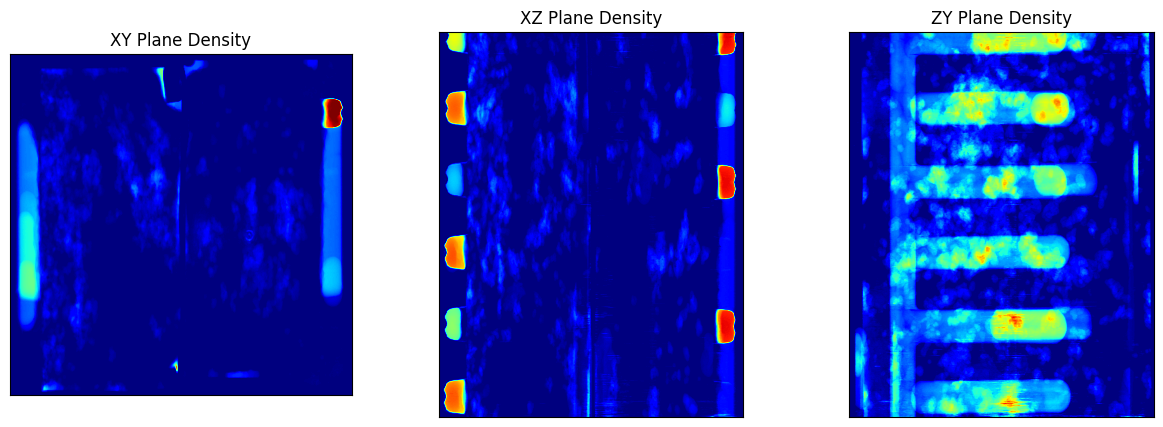

In [4]:
#We can directly visualize the 2D bubble densities in the three different planes

plot_densities(stack_name, case_name)

In [5]:
#Lets give a look to that segmented volume!
volume = tifffile.imread(stack_name) #load the stack

#Select if you want to analyse just one electrode or the whole cell
left_volume, right_volume = separate_volume(volume)

volume_of_interest = left_volume # or right volume or volume for the whole cell

#Clean the desired volume
cleaned_volume = clean_volume(volume_of_interest)

#Visualize the segmentation results in 3D
visualize_volume(cleaned_volume, False) #set True if you want to record a 360° gif of your volume 


In [6]:
#Now we can procede with the analysis of the volume
bubble_ratio(cleaned_volume) #This function calculates the bubble voxels, background voxels and their ratio. The results are then printed.


Total bubble volume:  3237482
Total background volume:  79626129
Bubble:background ratio: 0.0406585381037423


0.0406585381037423

In [7]:
#Individual shape analysis of the bubbles. Here a further cleaning pipeline is employed. The different bubble analyses are performed and stored in a CSV file for further plotting and visualization
filtered_volume, membrane_coords = individual_analysis(cleaned_volume, case_name)
csv_file = f"./{case_name}/{case_name}_csv.csv"

#If you have already analysed your volume, you can load the filtered_volume with this function:
#filtered_volume = np.load("./path/to/your/filtered/volume.npy")

#Let visualize the bubbles with individual colors
labeled_volume, num_features = label_bubbles(filtered_volume)
print("Number of detected bubbles",num_features)
visualize_labeled_volume(labeled_volume, num_features, False) #True for Gif capture

Starting number of bubbbles: 814
Number of bubbles 814
1
bubble volume  928.0
Sphericity:  0.559246821086448
[-0.73559121  0.18803432  0.65080616]
elongation:  1.0851028576376094
flatness:  1.9567789294613775
2
bubble volume  34632.0
Sphericity:  0.2528391998838655
[-0.99167962  0.1217138   0.04191993]
elongation:  3.255622275698039
flatness:  4.191554558431643
3
bubble volume  10.0
4
bubble volume  906.0
Sphericity:  0.7548443437271756
[-0.14493018  0.98941206  0.00768218]
elongation:  2.441715806720021
flatness:  1.5469717088752968
5
bubble volume  663.0
Sphericity:  0.6589677641009299
[-0.73653827 -0.57906452  0.34956495]
elongation:  1.3232467698243253
flatness:  1.6545122555928848
6
bubble volume  1486.0
Sphericity:  0.5925840751797543
[-0.75440616 -0.0710083  -0.65255587]
elongation:  1.6635194844211811
flatness:  1.5191945438937537
7
bubble volume  3.0
8
bubble volume  171920.0
Sphericity:  0.7126499681885499
[-0.00514871  0.9999452  -0.00911572]
elongation:  5.984971248555973
f

In [9]:
#We can also visualize each calculated property and color-map the bubbles according to the measured value
#Uncomment the property that you want to visualize

visualize_property("closest_distance", filtered_volume, csv_file, side="left", capture = False) #Under side give left, right or whole depending on which part of the volume you are interested
#visualize_property("volume", filtered_volume, csv_file, side="whole", capture = False)
#visualize_property("sphericity", filtered_volume, csv_file, side="whole", capture = False)
#visualize_property("orientation", filtered_volume, csv_file, side ="whole", capture = False)
#visualize_property("elongation", filtered_volume, csv_file, side ="whole", log=True,capture = False) #Log decides if you want to employ the logarithm of the number to color map the volume (recommended for features that spans over a large range of values)
#visualize_property("flatness", filtered_volume, csv_file, side ="whole", log=True, capture = False)

left
128.0
0       7.001078
1      27.197242
2       3.760486
3       6.482655
4       8.233513
         ...    
349     9.397325
350     9.120915
351     3.000000
352     1.750000
353     1.000000
Name: closest_distance, Length: 354, dtype: float64


NameError: name 'case_name' is not defined

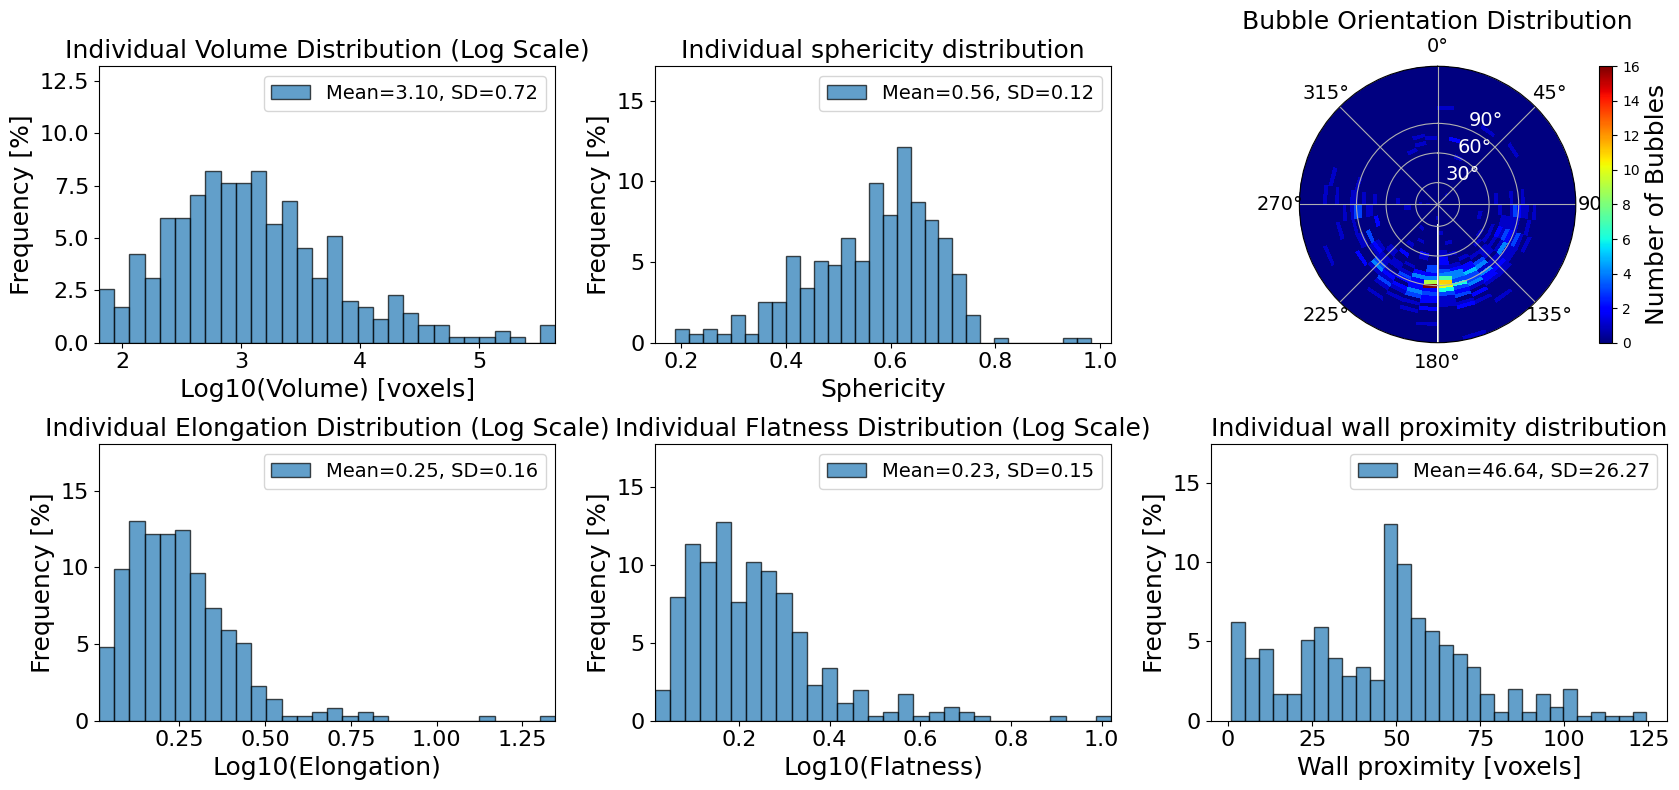

In [10]:
#We can also plot the histograms and diagramms that are calculated in the csv_file

plot_properties(csv_file)